In [53]:
#Execute this cell if have problem with relative import

import sys; sys.path.insert(0, '..')

In [54]:
import matplotlib.pyplot as plt
import numpy as np

In [55]:
import json
players_mlb = {}
with open("../Data/mlb_players.json", 'r') as json_file:
    players_mlb:dict = json.load(json_file)

In [56]:
all_batters = {k:players_mlb[k] for k in players_mlb.keys() if players_mlb[k]["Player type"]==2 and len(players_mlb[k]["batter_stats"])}

In [57]:
def batter_seasson_avg_Calc(stat, games, seasson_factor=164,r=0):
    player_factor = games/seasson_factor
    return round((stat/player_factor),r)

In [58]:
batter_in_hall= {k:all_batters[k] for k in all_batters.keys() if  all_batters[k]['HoF'] and all_batters[k]['HoF type']=='Player'}
batter_in_hall_nL = {k:batter_in_hall[k] for k in batter_in_hall.keys() if  batter_in_hall[k]['play_in_negro_league']==1}
batter_in_hall_mL = {k:batter_in_hall[k] for k in batter_in_hall.keys() if  batter_in_hall[k]['play_in_mayors']==1}
batters_more_2_seassons={k:all_batters[k] for k in all_batters.keys() if  all_batters[k]['total_seasons']>2}
batter_m2s_nL = {k:batters_more_2_seassons[k] for k in batters_more_2_seassons.keys() if  batters_more_2_seassons[k]['play_in_negro_league']==1}
batter_m2s_mL = {k:batters_more_2_seassons[k] for k in batters_more_2_seassons.keys() if  batters_more_2_seassons[k]['play_in_mayors']==1}

In [59]:
print(f"All Batters:{len(all_batters)}")
print("------------------->>")
print(f"More 2 seasons{len(batters_more_2_seassons)}")
print(f"More 2 seasons negroL: {len(batter_m2s_nL)}")
print(f"More 2 seasons mayorL: {len(batter_m2s_mL)}")
print("------------------->>")
print(f"In Hall: {len(batter_in_hall)}")
print(f"In Hall negroL: {len(batter_in_hall_nL)}")
print(f"In Hall mayorL: {len(batter_in_hall_mL)}")

All Batters:12521
------------------->>
More 2 seasons7043
More 2 seasons negroL: 593
More 2 seasons mayorL: 6554
------------------->>
In Hall: 185
In Hall negroL: 24
In Hall mayorL: 169


In [60]:
def bat_stat_comparison(groups, stat, labels, avg=False):
    g = []
    avg_g = []
    problems_count = 0
    for group in groups:
        g1 = []
        avg_g1 = []
        for k in group.keys():
            b_stats = group[k]["batter_stats"]
            not_ok = isinstance(b_stats[stat]['summary'], str)
            if not_ok:
                problems_count+=1
                continue
            if avg:
                if b_stats.get('G') == None:
                    print(group[k])
                games = b_stats['G']["summary"]
                avg_g1.append(batter_seasson_avg_Calc(b_stats[stat]['summary'], games))
            g1.append(b_stats[stat]['summary'])
        avg_g.append(avg_g1)
        g.append(g1)
    medianprops = dict(linestyle='-', linewidth=2.5, color='red')
    meanlineprops = dict(linestyle='--', linewidth=1, color='yellow')
    if avg:       
        fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(16, 12))

        ax1.boxplot(g,vert=True, medianprops=medianprops, meanprops=meanlineprops, meanline=True, showmeans=True, patch_artist=True,labels=labels)
        fig.suptitle(stat + ' x batter Group')
        ax1.yaxis.grid(True)
        ax1.set_title("Acumulative")

        ax2.boxplot(avg_g,vert=True, medianprops=medianprops, meanprops=meanlineprops, meanline=True, showmeans=True, patch_artist=True,labels=labels)
        ax2.yaxis.grid(True)
        ax2.set_title("Avg x Season")
    else:
        fig, ax1 = plt.subplots(figsize=(12, 6))
        ax1.boxplot(g,vert=True, medianprops=medianprops, meanprops=meanlineprops, meanline=True, showmeans=True, patch_artist=True,labels=labels)
        fig.suptitle(stat + ' x batter Group')
        ax1.yaxis.grid(True)
        ax1.set_title("Acumulative")
    print(f"Number of players with not stats in {stat}:{problems_count}")
    plt.show()

In [61]:
group = [all_batters, batter_m2s_nL, batter_in_hall_nL, batter_m2s_mL, batter_in_hall_mL]
labels = ['All', 'negroL-3seasson+', 'negroL-HoF', 'mayorL-3seasson+', 'mayorL-HoF']

Number of players with not stats in H:0


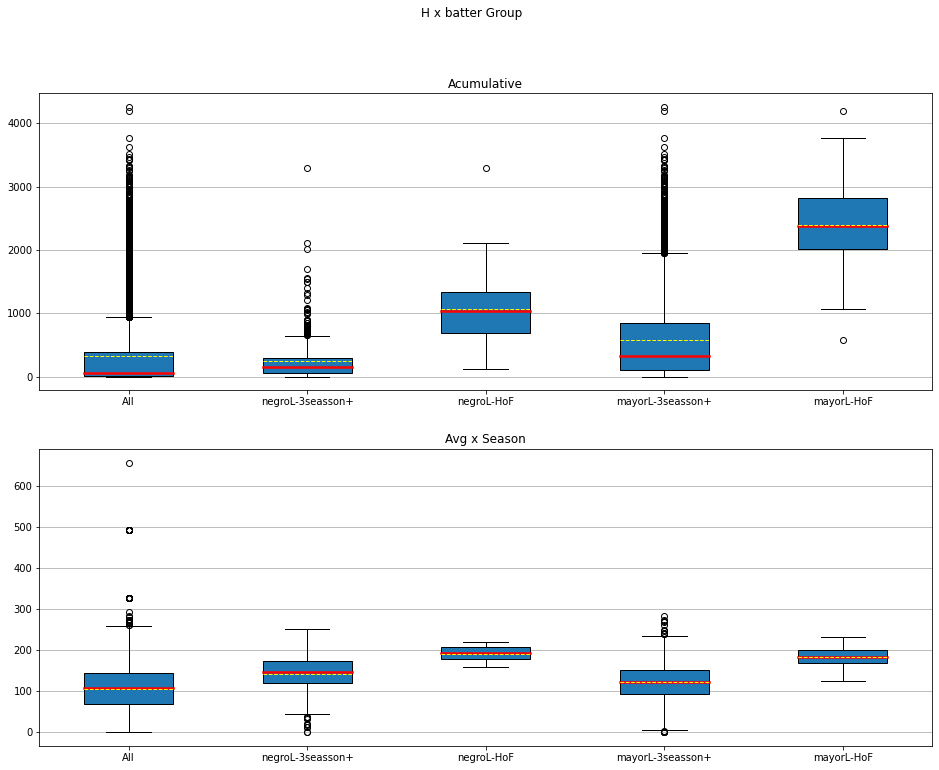

In [62]:
bat_stat_comparison(group, "H", labels, True)

Number of players with not stats in BA:154


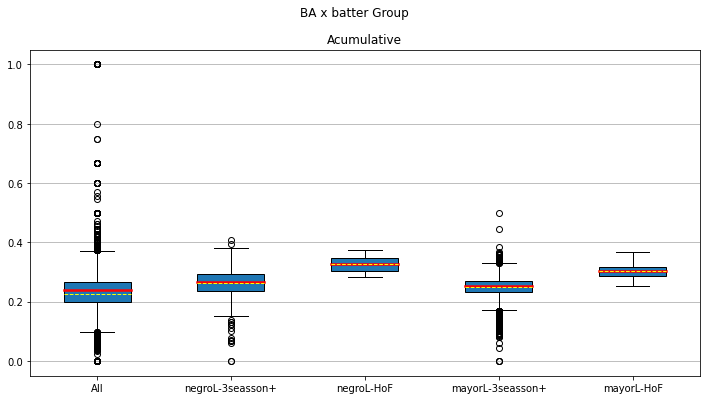

In [63]:
bat_stat_comparison(group, "BA", labels)

Comprobamos si el Bat Average puede ser un buen threshold para los bateadores del Hall

In [64]:
for batId in batter_in_hall.keys():
    ba = batter_in_hall[batId]['batter_stats']['BA']['summary']
    if ba < 0.2:
        print(batter_in_hall[batId])

Number of players with not stats in HR:0


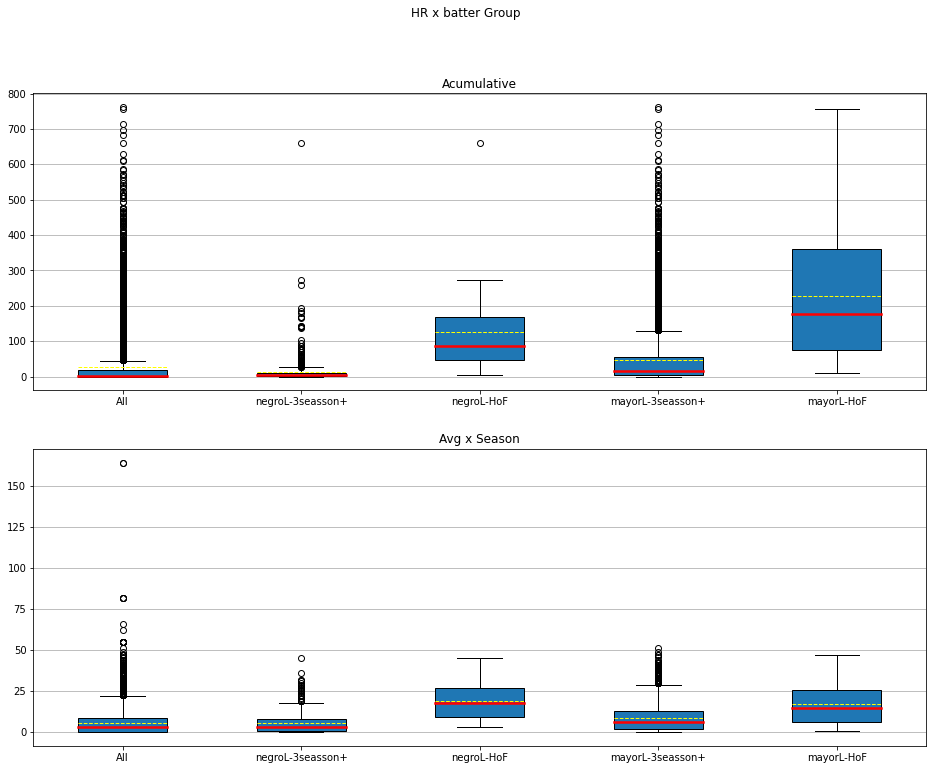

In [65]:
bat_stat_comparison(group, "HR", labels, True)

Number of players with not stats in RBI:183


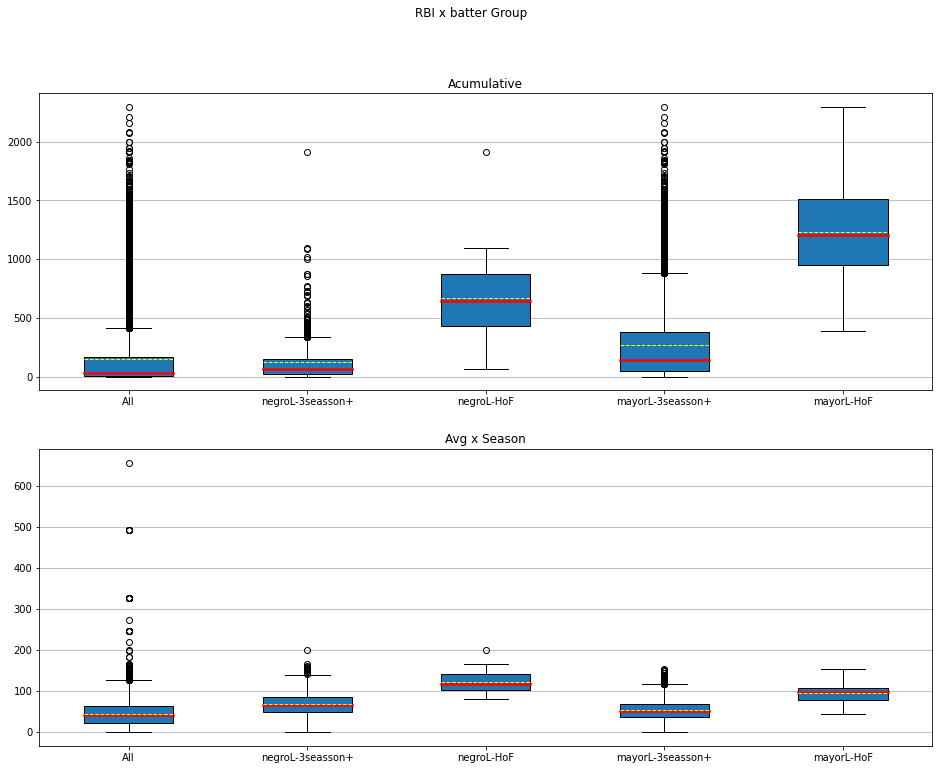

In [66]:
bat_stat_comparison(group, "RBI", labels, True)

Number of players with not stats in R:0


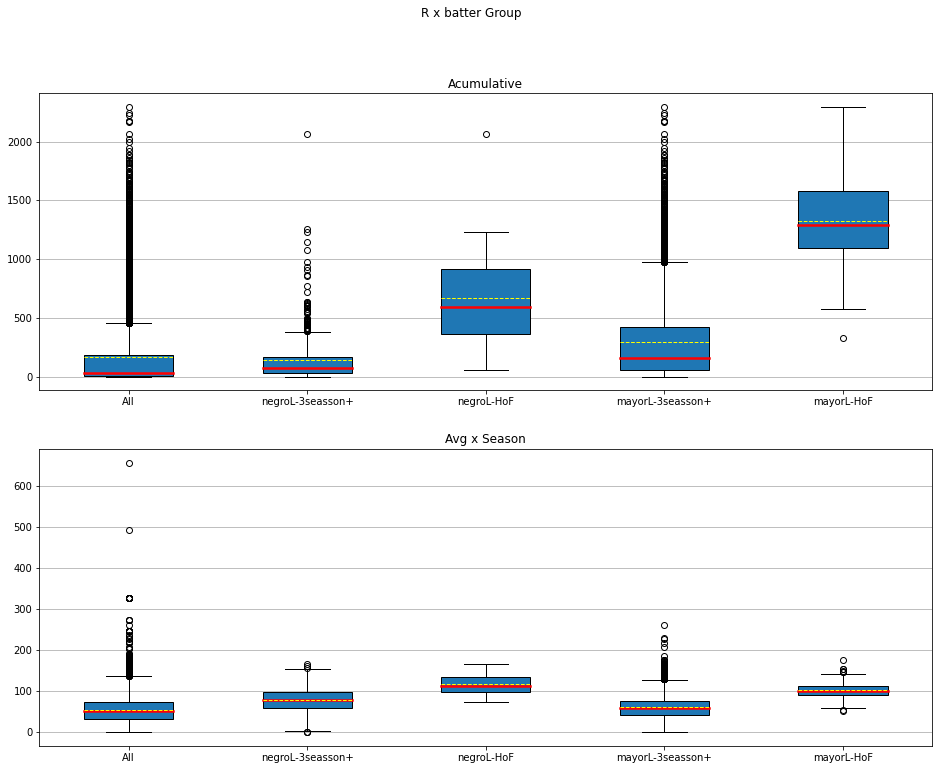

In [67]:
bat_stat_comparison(group, "R", labels, True)

Number of players with not stats in SLG:154


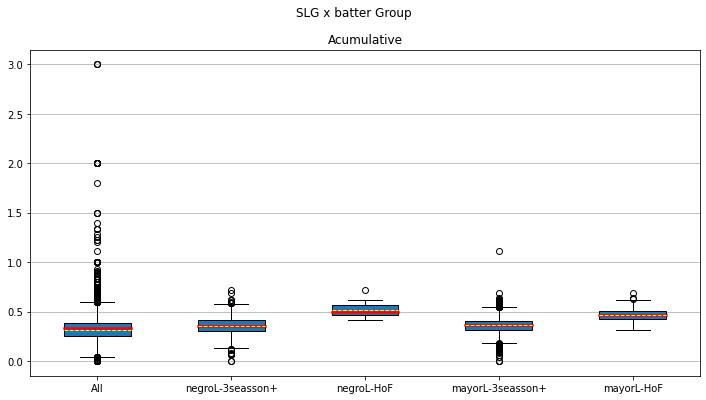

In [68]:
bat_stat_comparison(group, "SLG", labels)

Number of players with not stats in OPS:154


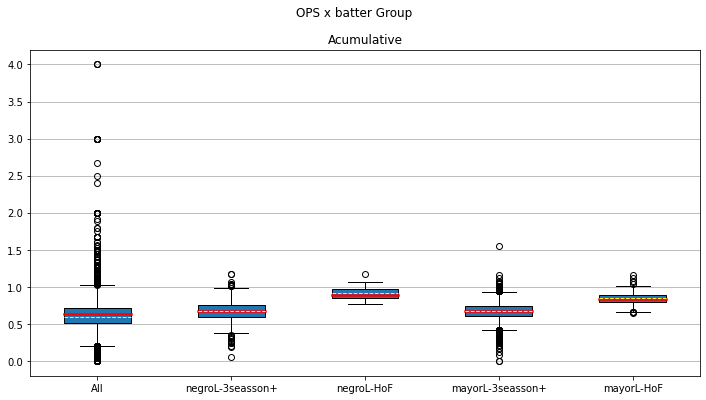

In [69]:
bat_stat_comparison(group, "OPS", labels)

Number of players with not stats in OPS+:154


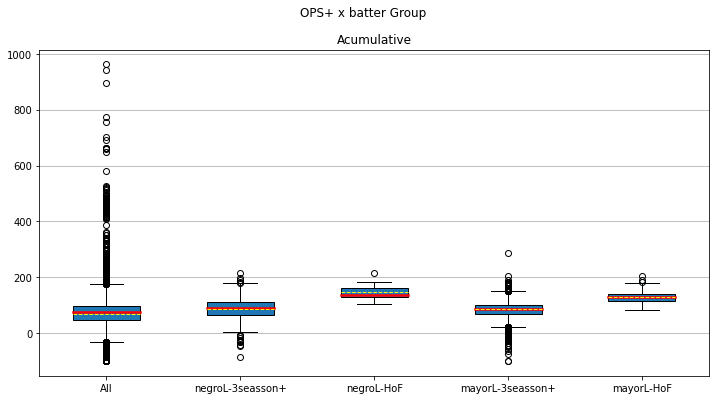

In [70]:
bat_stat_comparison(group, "OPS+", labels)

Number of players with not stats in WAA:98


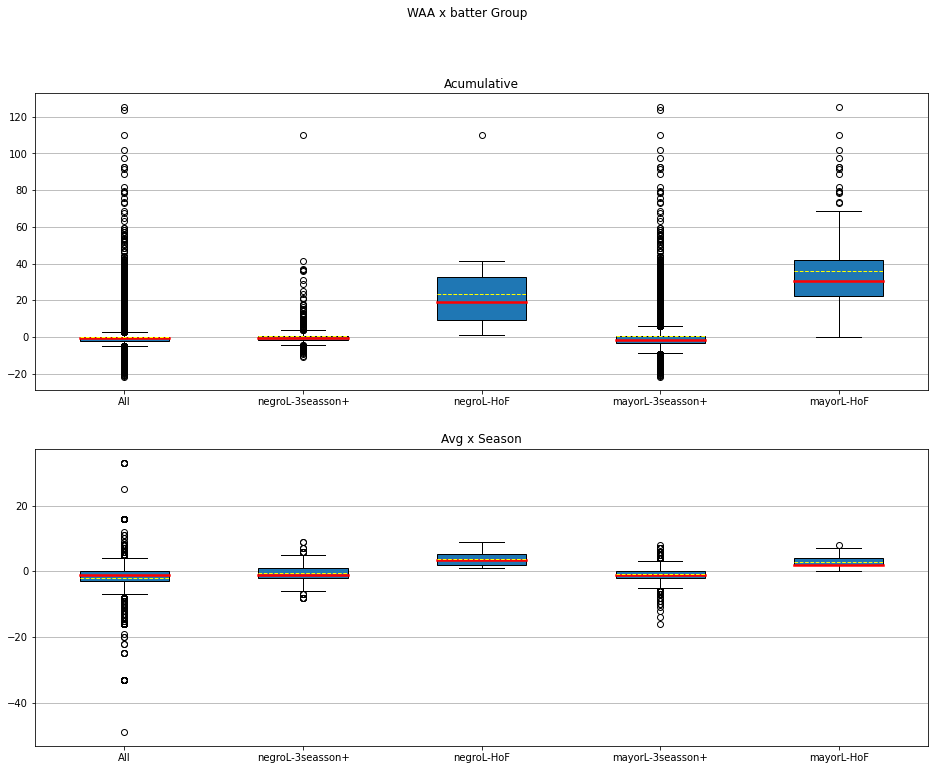

In [71]:
bat_stat_comparison(group, "WAA", labels, True)

Number of players with not stats in WAR:283


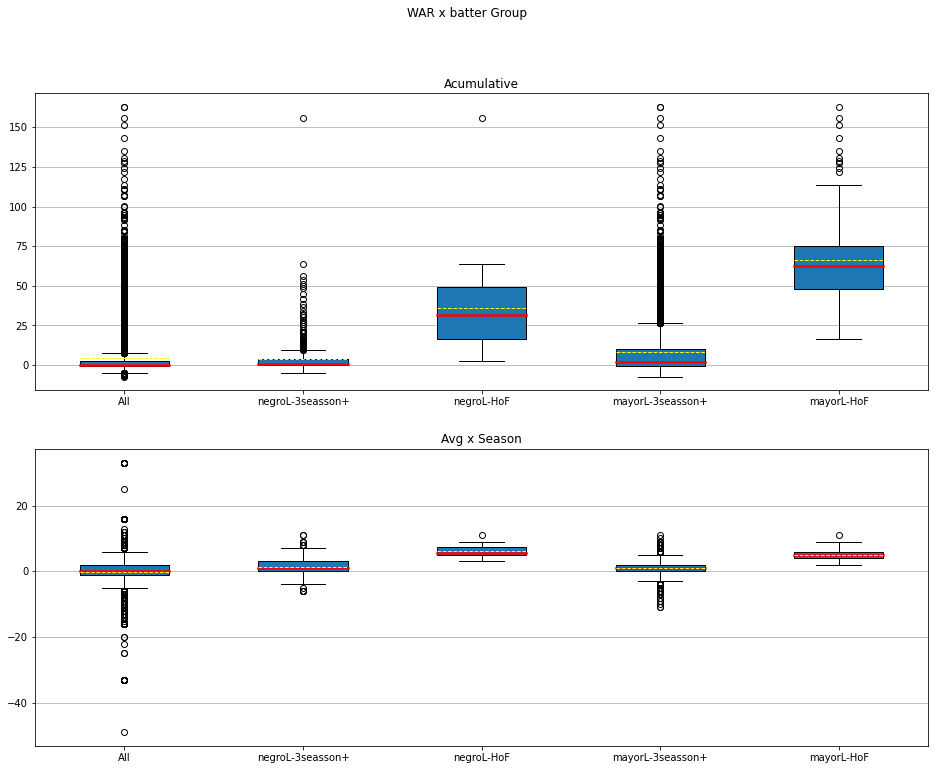

In [72]:
bat_stat_comparison(group, "WAR", labels, True)

Comprobamos si el WAR puede ser un buen threshold para los bateadores del Hall

In [73]:
war_less = []
min_war = 1000
for batId in batter_in_hall_mL.keys():
    war = batter_in_hall_mL[batId]['batter_stats']['WAR']['summary']
    min_war = min(min_war, war)
    if war < 10:
        war_less.append((war,batter_in_hall_mL[batId]['Url']))
print(war_less)
print(min_war)

[]
16.2


Number of players with not stats in RAA:98


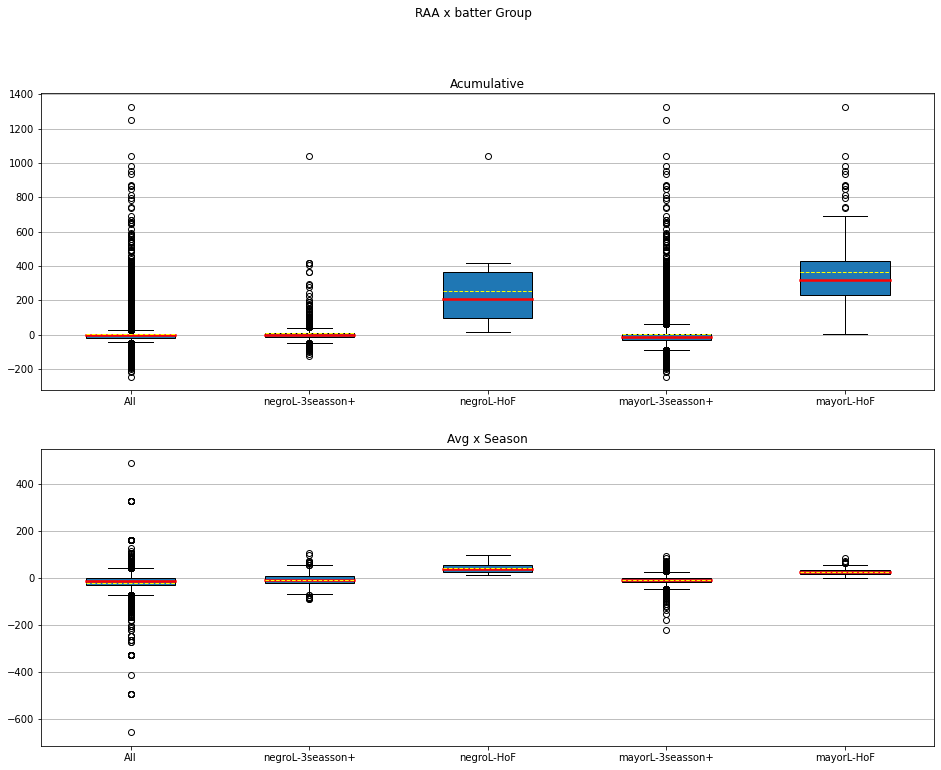

In [74]:
bat_stat_comparison(group, "RAA", labels, True)

Number of players with not stats in AB:0


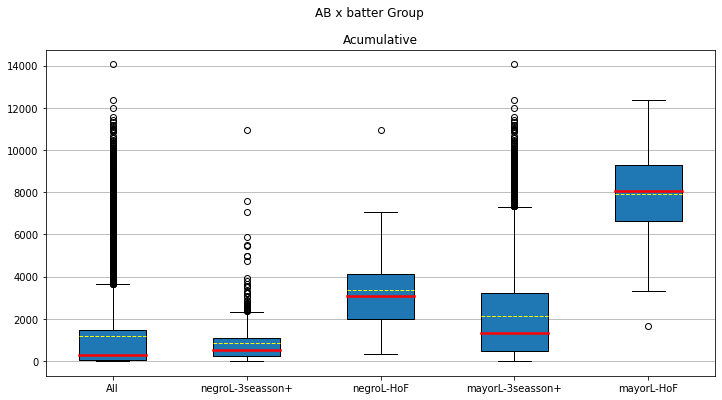

In [75]:
bat_stat_comparison(group, "AB", labels)

Number of players with not stats in PA:0


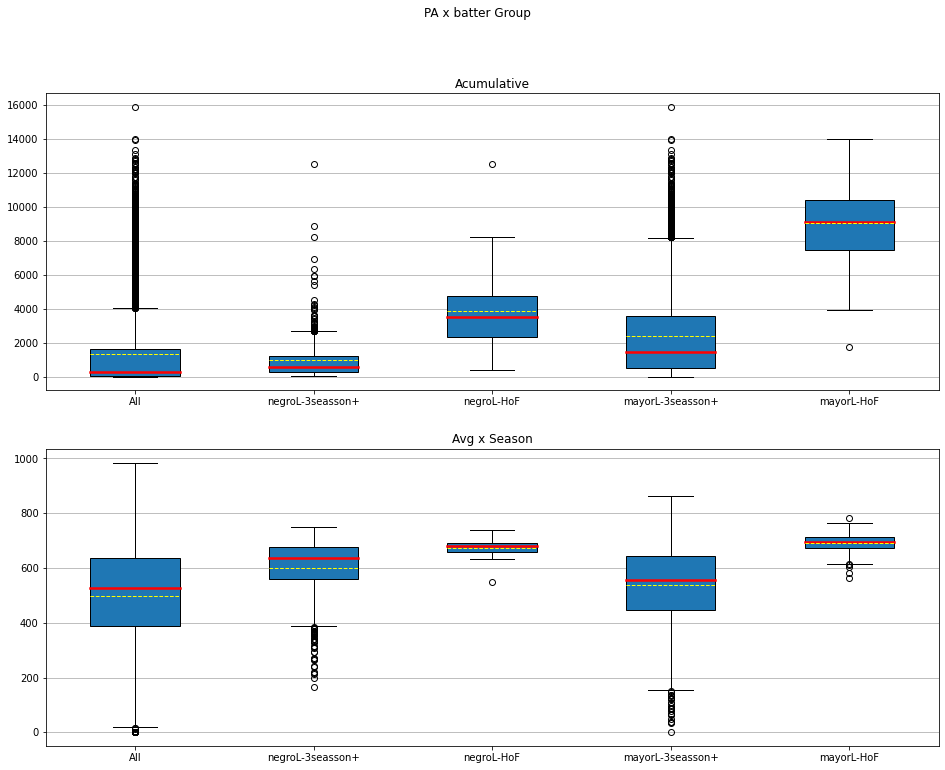

In [76]:
bat_stat_comparison(group, "PA", labels, True)

Number of players with not stats in TB:0


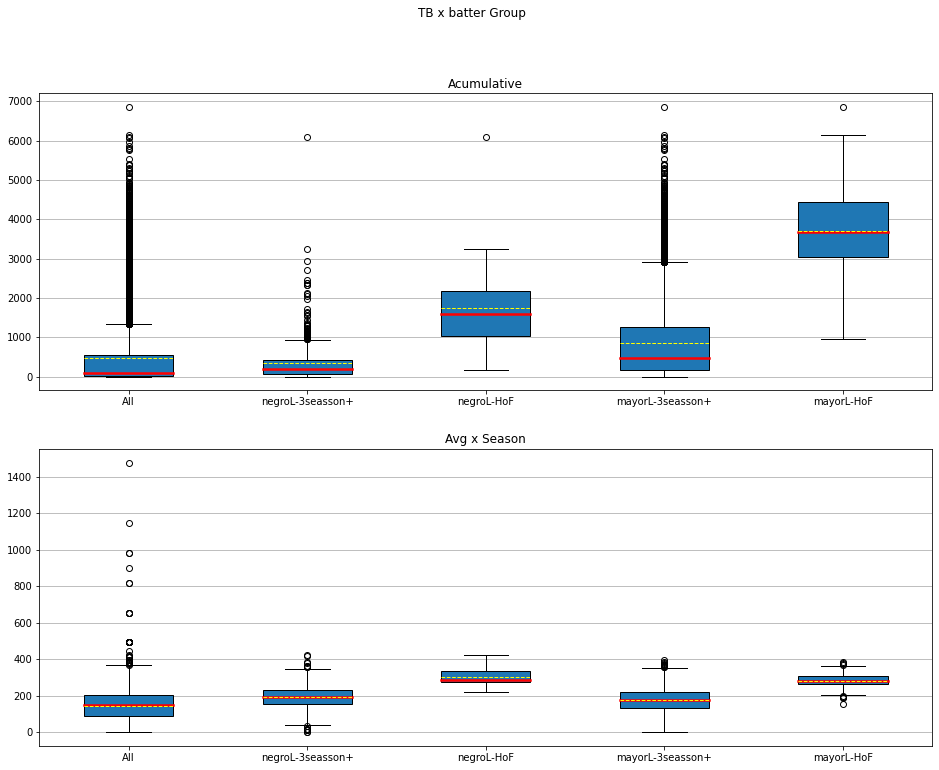

In [77]:
bat_stat_comparison(group, "TB", labels, True)

Number of players with not stats in CS:5056


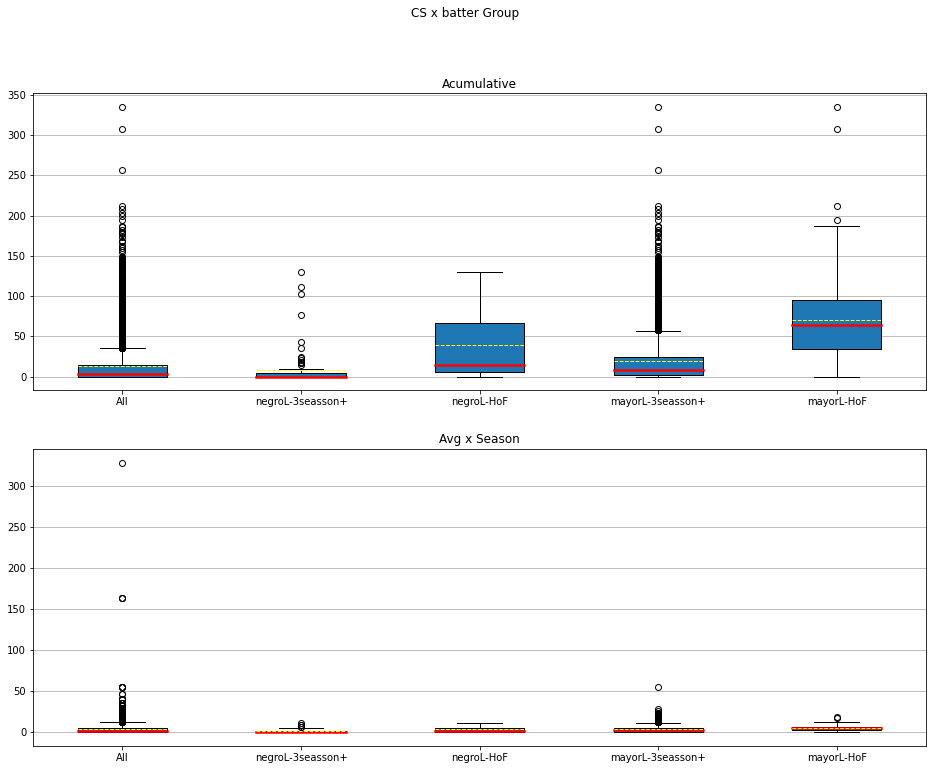

In [78]:
bat_stat_comparison(group, "CS", labels, True)

Number of players with not stats in SB:434


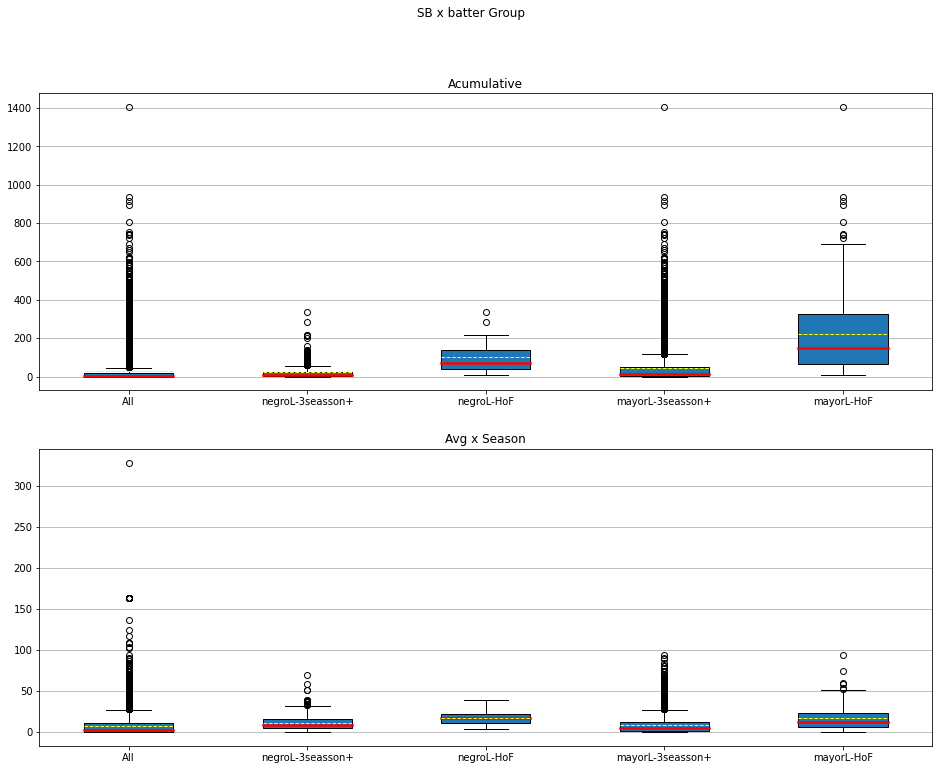

In [79]:
bat_stat_comparison(group, "SB", labels, True)

Number of players with not stats in Rpos:98


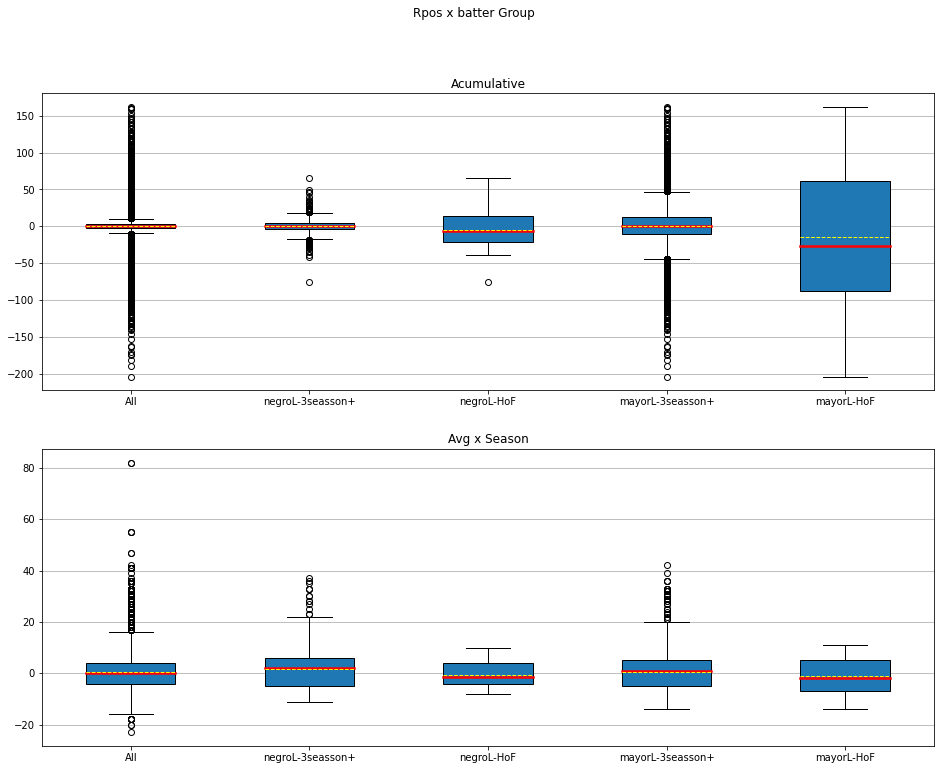

In [80]:
bat_stat_comparison(group, "Rpos", labels, True)

Number of players with not stats in Rbat:0


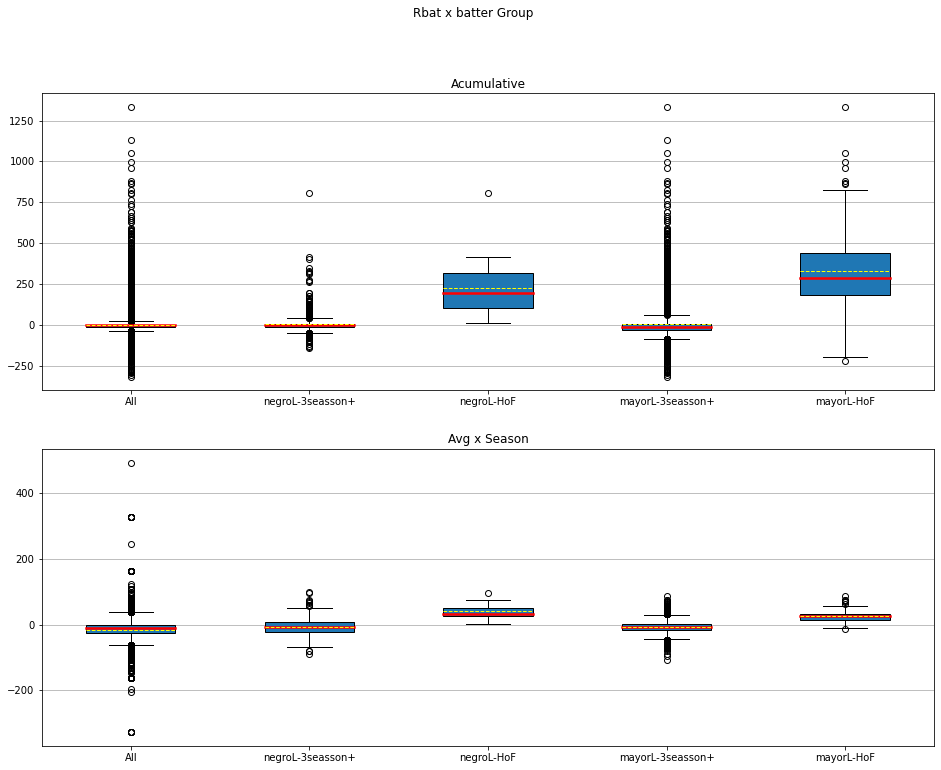

In [81]:
bat_stat_comparison(group, "Rbat", labels, True)

Number of players with not stats in Rbaser:0


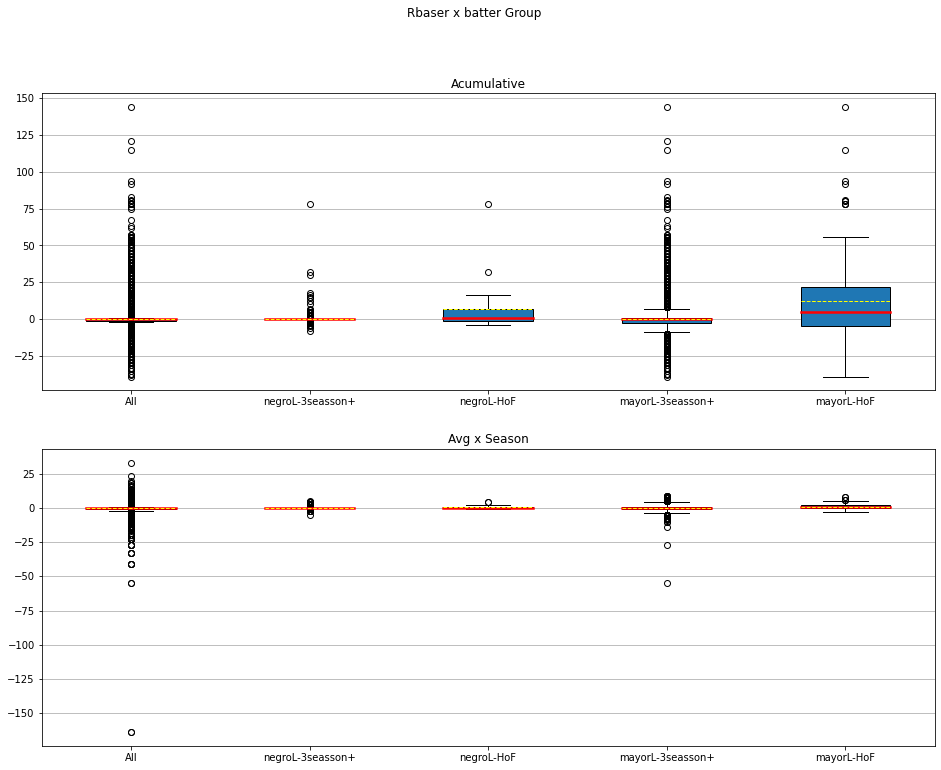

In [82]:
bat_stat_comparison(group, "Rbaser", labels, True)

Number of players with not stats in Rfield:0


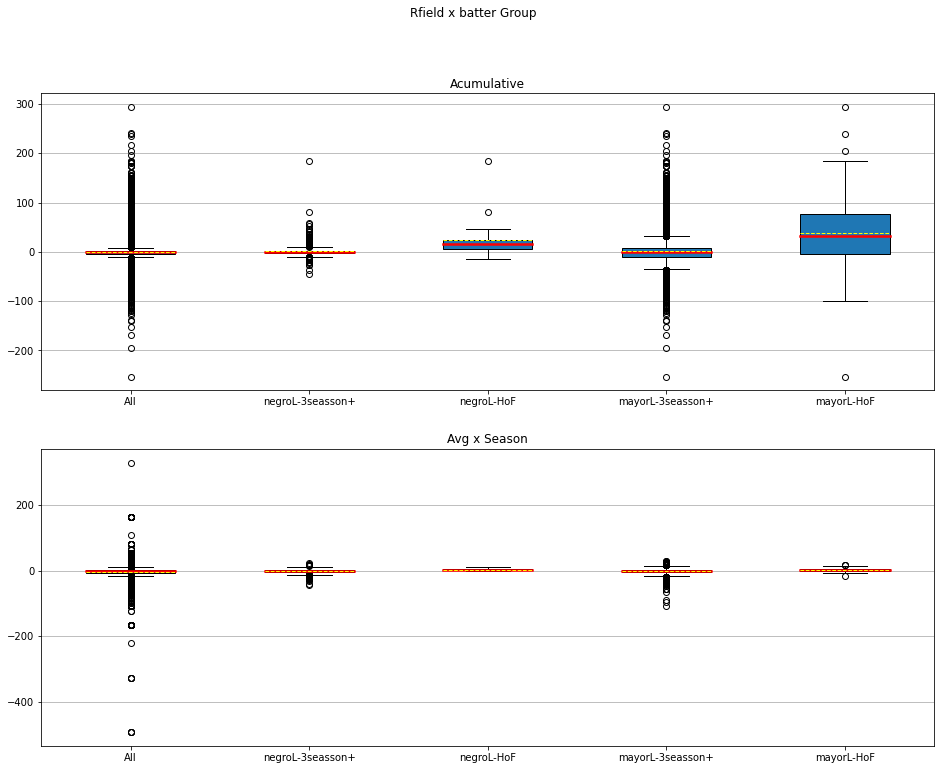

In [83]:
bat_stat_comparison(group, "Rfield", labels, True)

Number of players with not stats in 2B:0


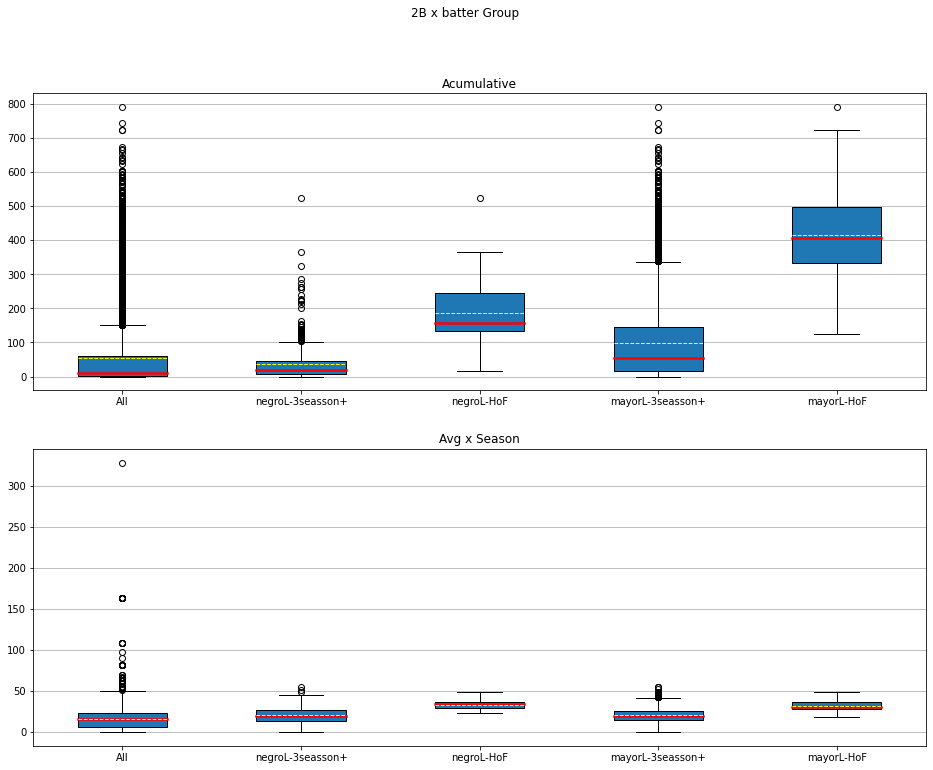

In [84]:
bat_stat_comparison(group, "2B", labels, True)

Number of players with not stats in 3B:0


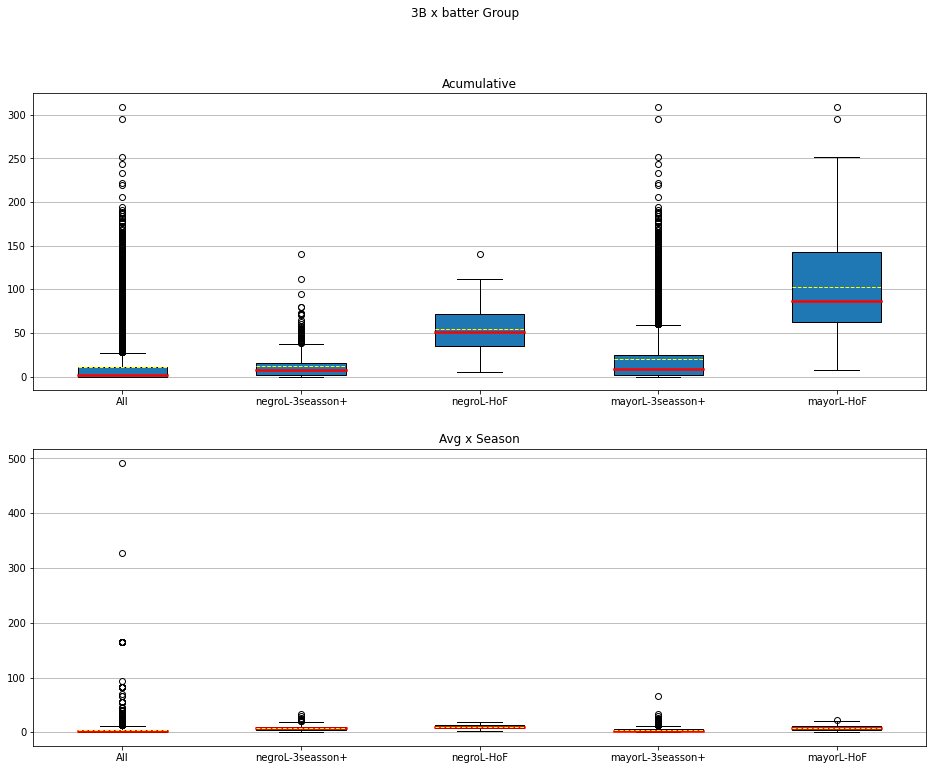

In [85]:
bat_stat_comparison(group, "3B", labels, True)

Number of players with not stats in Rdp:0


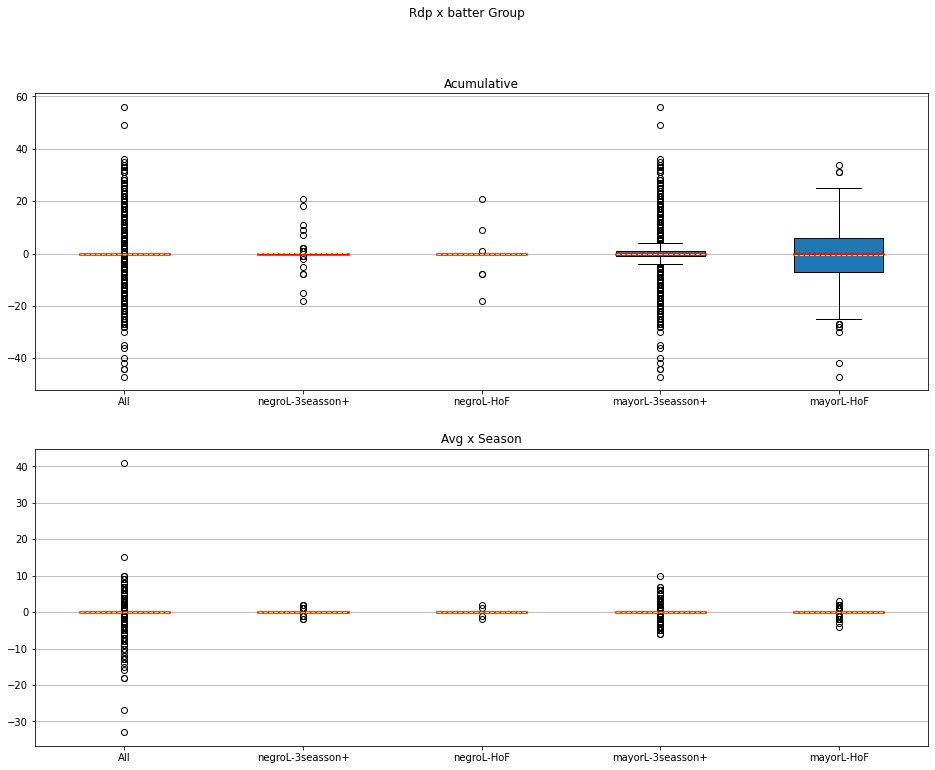

In [86]:
bat_stat_comparison(group, "Rdp", labels, True)